# Using Monte Carlo simulation to predict future stock prices.

In [13]:
# Using Monte Carlo simulation to predict future stock prices.

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to fetch historical stock data from Yahoo Finance
def fetch_stock_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    return data

# Function to perform Monte Carlo simulation and plot the results
def monte_carlo_simulation(ticker, historical_days, future_days):
    # Fetch historical stock data from Yahoo Finance
    end_date = pd.to_datetime('today')
    start_date = end_date - pd.DateOffset(days=historical_days)  # Calculate start date based on historical_days
    
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    
    # Calculate historical daily returns for the specified historical days
    historical_returns = stock_data['Adj Close'].pct_change().dropna().tail(historical_days)
    
    # Get the last known stock price
    last_known_price = stock_data['Adj Close'].iloc[-1]
    
    # Perform Monte Carlo simulation for future days
    num_simulations = 1000  # Number of Monte Carlo simulations
    num_days = future_days  # Number of future days to simulate
    simulated_prices = []
    
    for _ in range(num_simulations):
        # Generate random daily returns based on historical data mean and standard deviation
        daily_return_mean = historical_returns.mean()
        daily_return_std = historical_returns.std()
        random_returns = np.random.normal(daily_return_mean, daily_return_std, num_days)
        
        # Calculate simulated prices using random returns
        simulated_prices.append(np.append([last_known_price], last_known_price * (1 + np.cumsum(random_returns))))
    
    # Calculate confidence intervals for future prices
    lower_bound_68 = np.percentile(simulated_prices, 16, axis=0)  # 68% Confidence Interval (34th to 84th percentile)
    upper_bound_68 = np.percentile(simulated_prices, 84, axis=0)
    lower_bound_99 = np.percentile(simulated_prices, 0.5, axis=0)  # 99% Confidence Interval (0.5th to 99.5th percentile)
    upper_bound_99 = np.percentile(simulated_prices, 99.5, axis=0)
    
    # Dates for the future days (including today)
    future_dates = pd.date_range(end_date, periods=num_days + 1)  # +1 to include today's date
    
    # Plot historical data and Monte Carlo simulation with different confidence intervals
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index[-historical_days:], stock_data['Adj Close'].tail(historical_days), label=f'Historical Stock Prices ({historical_days} Days)', color='blue', linewidth=2)
    plt.plot(future_dates, lower_bound_68, label='Lower 68% Confidence', color='green', linestyle='dashed', linewidth=1)
    plt.plot(future_dates, upper_bound_68, label='Upper 68% Confidence', color='green', linestyle='dashed', linewidth=1)
    plt.fill_between(future_dates, lower_bound_68, upper_bound_68, color='green', alpha=0.2)
    plt.plot(future_dates, lower_bound_99, label='Lower 99% Confidence', color='orange', linestyle='dashed', linewidth=1)
    plt.plot(future_dates, upper_bound_99, label='Upper 99% Confidence', color='orange', linestyle='dashed', linewidth=1)
    plt.fill_between(future_dates, lower_bound_99, upper_bound_99, color='orange', alpha=0.2)
    
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Monte Carlo Simulation for {ticker} Stock Prices (Next {num_days} Days)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Example usage of the function with user inputs
ticker_symbol = input("Enter Company Ticker: ")
historical_days = int(input("Enter Number of Historical Days: "))
future_days = int(input("Enter Number of Future Days to Simulate: "))

monte_carlo_simulation(ticker_symbol, historical_days, future_days)

#

# Determining if today's returns are an anomaly based on historical data at a 95% confidence interval

In [29]:
# Determining if today's returns are an anomaly based on historical data at a 95% confidence interval

import yfinance as yf
import numpy as np
from datetime import datetime, timedelta

def analyze_stock_return(days_ago):
    # Fetch historical stock data including returns from Yahoo Finance
    ticker_symbol = "AAPL"
    
    # Calculate end date as today's date
    end_date = datetime.today().strftime('%Y-%m-%d')
    
    # Calculate start date based on user input (number of days ago)
    start_date = (datetime.today() - timedelta(days=days_ago)).strftime('%Y-%m-%d')
    
    # Fetch stock data within the specified range
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    returns = stock_data['Adj Close'].pct_change().dropna()
    
    # Calculate today's return (replace this with the actual return value)
    today_return = stock_data['Adj Close'].pct_change().dropna().iloc[-1]
    
    # Date used for analysis
    analysis_date = returns.index[-1].strftime('%Y-%m-%d')
    
    # Calculate z-score
    historical_mean = returns.mean()
    historical_std = returns.std()
    z_score = (today_return - historical_mean) / historical_std
    
    # Calculate percentile
    percentile = (returns < today_return).mean() * 100
    
    # Calculate confidence interval bounds
    lower_bound = np.percentile(returns, 2.5)
    upper_bound = np.percentile(returns, 97.5)
    
    # Check for anomaly detection
    if today_return < lower_bound or today_return > upper_bound:
        result = f"Data for {analysis_date} indicates an anomaly in the return."
    else:
        result = f"Data for {analysis_date} shows that the return is within the expected range."
    
    return result, z_score, percentile, lower_bound, upper_bound

In [31]:
days_ago = int(input("Enter the number of days ago for the start date: "))
result, z_score, percentile, lower_bound, upper_bound = analyze_stock_return(days_ago)
print(result)
print(f"Z-Score: {z_score}")
print(f"Percentile: {percentile}%")
print(f"Lower Bound (95% CI): {lower_bound}")
print(f"Upper Bound (95% CI): {upper_bound}")


[*********************100%%**********************]  1 of 1 completed
Data for 2023-10-27 shows that the return is within the expected range.
Z-Score: 0.47280359428672464
Percentile: 72.39999999999999%
Lower Bound (95% CI): -0.032626427413246305
Upper Bound (95% CI): 0.03281919055131111


#

# Determining anomalies within a range of historical data at a 95% confidence interval

[*********************100%%**********************]  1 of 1 completed


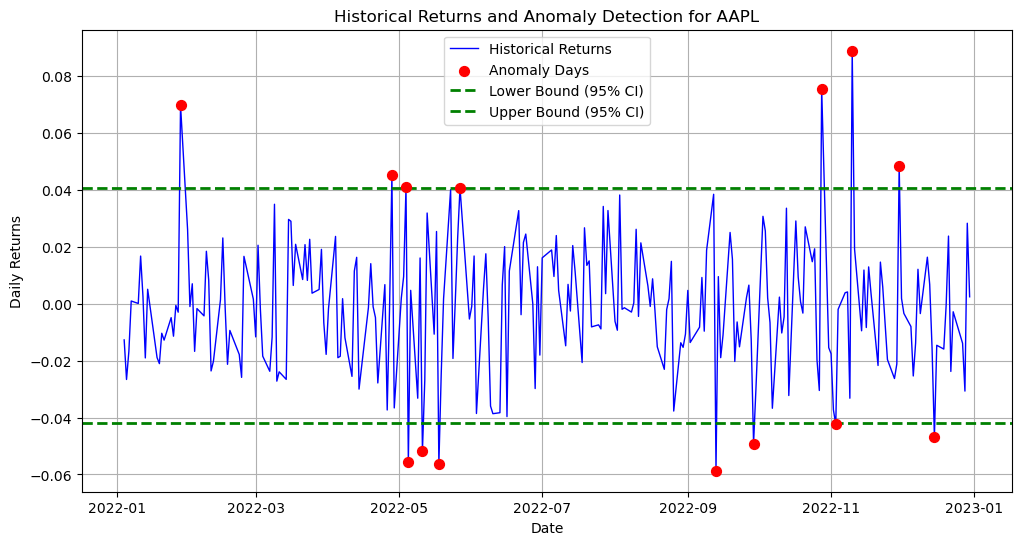

In [32]:
# Determining anomalies within a range of historical data at a 95% confidence interval

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical stock data including returns from Yahoo Finance
ticker_symbol = "AAPL"
stock_data = yf.download(ticker_symbol, start="2022-01-01", end="2022-12-31")
returns = stock_data['Adj Close'].pct_change().dropna()

# Calculate confidence interval bounds
lower_bound = np.percentile(returns, 2.5)
upper_bound = np.percentile(returns, 97.5)

# Identify the days where the return is not within the expected range
anomaly_days = returns[(returns < lower_bound) | (returns > upper_bound)]

# Plot historical returns
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns.values, label='Historical Returns', color='blue', linewidth=1)

# Highlight days where the return is not within the expected range
plt.scatter(anomaly_days.index, anomaly_days.values, color='red', label='Anomaly Days', s=50, zorder=5)

# Plot confidence interval bounds
plt.axhline(lower_bound, color='green', linestyle='dashed', linewidth=2, label='Lower Bound (95% CI)')
plt.axhline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Upper Bound (95% CI)')

plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title(f'Historical Returns and Anomaly Detection for {ticker_symbol}')
plt.legend()
plt.grid(True)
plt.show()
